# 2.1 Кластеризация. Птичка.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [ODS: Обучение без учителя: PCA и кластеризация](https://habrahabr.ru/company/ods/blog/325654/)
- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

In [2]:
# на всякий случай, список пакетов которые должны быть установлены
!pip3 install numpy pandas scipy sklearn matplotlib seaborn Pillow scikit-image

You should consider upgrading via the 'pip install --upgrade pip' command.


## Изображения (6 баллов)

С помощью алгоритмов кластеризации можно уменьшить число цветов в изображении. В данном случае будут кластеризоваться похожие пиксели. Такой подход позволяет перейти к суперпиксельному представлению изображений, которое является более компактным и используется в задачах компьютерного зрения.

Загрузим картинку `data/bird.jpg` с помощью scikit-image и выведите ее с помощью matplotlib.

In [3]:
colab = False # если работаете на своём компьютере, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive/')

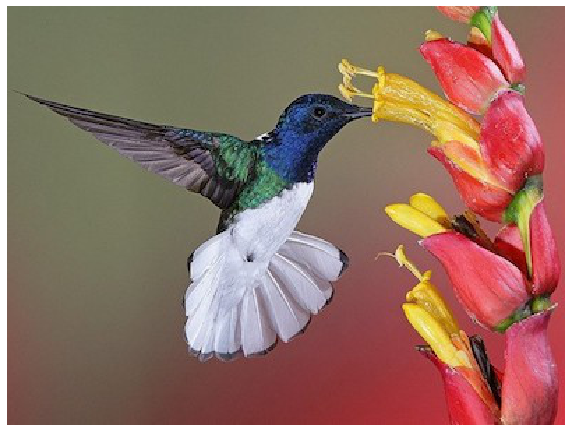

In [4]:
%matplotlib inline
from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np

if colab:
    img = imread("/content/drive/My Drive/Data/bird.jpg")
else:
    img = imread("./data/bird.jpg")
plt.figure(figsize=(10,15))
plt.axis('off')
plt.imshow(img)

### 1.1 Scale (0.5 балла)

Если вы посмотрите на содержимое numpy массива, в котором хранится изображение, то увидите, что там будут числа от 0 до 255. Нам лучше перейти к числам от 0 до 1. 

**Преобразуйте вашу матрицу, как сказано выше.**

**Hint**: Это можно сделать с помощью функции `skimage.img_as_float`.

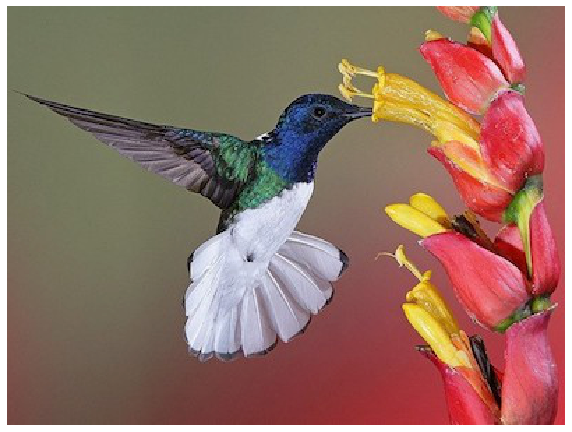

In [5]:
from skimage import img_as_float
img_float = img_as_float(img)
plt.figure(figsize=(10,15))
plt.axis('off')
plt.imshow(img_float)

### 1.2 Reshape (1 балл)

Мы получили матрицу размера `(300, 400, 3)`. Нам это не подходит. Чтобы запустить kMeans нам нужно иметь много-много объектов и 3 признака - значение яркости пикселя в канале Red, Green и Blue. 

**Преобразуйте матрицу так, чтобы получилась матрица размера `(120000, 3)`. **

**Hint**: Вам пригодятся функции: `np.ravel` и `np.vstack`.

In [6]:

#print(img)
img_reshaped = np.ravel(img_float).reshape(120000, 3)
print(img_reshaped)


[[0.43529412 0.45882353 0.35686275]
 [0.43529412 0.45882353 0.35686275]
 [0.43529412 0.45882353 0.35686275]
 ...
 [0.81176471 0.2        0.25490196]
 [0.80392157 0.19607843 0.25882353]
 [0.79607843 0.19607843 0.26666667]]


### 1.3 Train (0.5 балла)

Отлично. У нас есть подготовленные данные. Теперь мы будем находить кластеры похожих пикселей по цвету. Для этого создайте KMeans для, например, 8 цветов. **Обучите модель** (может занять около 10 секунд). С помощью магического макроса `%time` **покажите, сколько времени у вас занимало обучение**.

In [7]:
from sklearn.cluster import KMeans

%time kmeans = KMeans(random_state=0).fit(img_reshaped)
print(kmeans)

CPU times: user 7.86 s, sys: 2.78 s, total: 10.6 s
Wall time: 5.48 s
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


### 1.4 Draw centroids (1 балл)

**Нарисуйте с помощью imshow центры кластеров**: будет 8 пикселей со средним цветом по всему кластеру. 
Это называется цветовой палитрой. 

**Hint**: reshape в 3 мерный массив, так как у вас будет 2-мерный

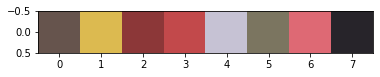

In [8]:
plt.imshow(kmeans.cluster_centers_.reshape(1,8,3))
labels = kmeans.cluster_centers_.reshape(1,8,3)
#print(labels)

### 1.5 Draw final image (3 балла)

У нас есть значения цвета для каждого центра кластера. Каждый пиксель в результате обучения KMeans теперь имеет свой лейбл кластера. Значит мы можем заменить все пиксели на соответсвующие им центры класетров. Проведите это преобразование и выведите 8-цветное изображение.

**Hints**: `labels_`, `reshape`, `copy`, логические маски в numpy `arr[arr == 1] = 0`. У меня это 7 строк кода.

[[[0.48598409 0.45899306 0.37709765]
  [0.48598409 0.45899306 0.37709765]
  [0.48598409 0.45899306 0.37709765]
  ...
  [0.48598409 0.45899306 0.37709765]
  [0.48598409 0.45899306 0.37709765]
  [0.48598409 0.45899306 0.37709765]]

 [[0.48598409 0.45899306 0.37709765]
  [0.48598409 0.45899306 0.37709765]
  [0.48598409 0.45899306 0.37709765]
  ...
  [0.48598409 0.45899306 0.37709765]
  [0.48598409 0.45899306 0.37709765]
  [0.48598409 0.45899306 0.37709765]]

 [[0.48598409 0.45899306 0.37709765]
  [0.48598409 0.45899306 0.37709765]
  [0.48598409 0.45899306 0.37709765]
  ...
  [0.48598409 0.45899306 0.37709765]
  [0.48598409 0.45899306 0.37709765]
  [0.48598409 0.45899306 0.37709765]]

 ...

 [[0.40323081 0.33265167 0.30400343]
  [0.40323081 0.33265167 0.30400343]
  [0.40323081 0.33265167 0.30400343]
  ...
  [0.76255687 0.28822134 0.29417421]
  [0.76255687 0.28822134 0.29417421]
  [0.76255687 0.28822134 0.29417421]]

 [[0.40323081 0.33265167 0.30400343]
  [0.40323081 0.33265167 0.30400343]


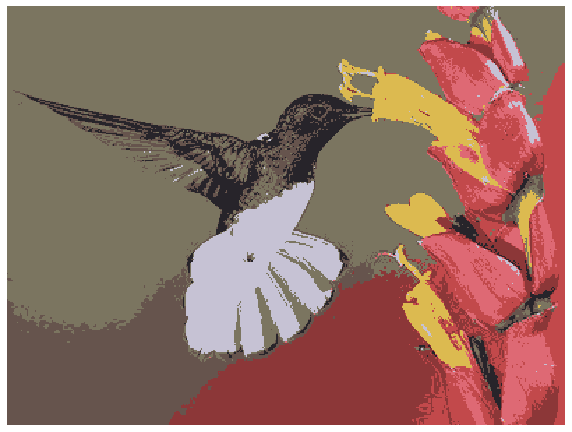

In [9]:

#def final_wiew(x):
   # return labels[kmeans.labels_[[img_reshaped == x]][0]]
#    for pixel in k:
img_final = img_reshaped.copy()
#img_final.apply(final_view) 
range1 = np.arange(8) 
for i in range1:
    img_final[kmeans.labels_ == i] = labels[0][i]

img_final = np.ravel(img_final).reshape(300,400,3)
print(img_final)
plt.figure(figsize=(10,15))
plt.axis('off')
plt.imshow(img_final)